In [2]:
from tensorflow.keras.datasets import mnist

In [9]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [10]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

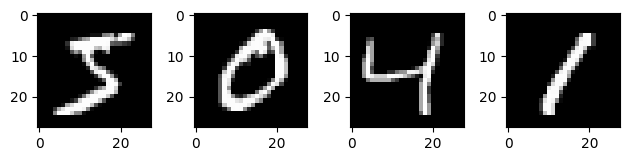

In [12]:
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(X_train[i],cmap='grey')
plt.tight_layout()
plt.show()

In [13]:
X_train=X_train/255
X_test=X_test/255

In [14]:
X_test=X_test.reshape(-1,28,28,1)
X_train=X_train.reshape(-1,28,28,1)

In [15]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [21]:
from keras import activations
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
model=Sequential([
    Conv2D(32,kernel_size=(3,3), activation='relu' , input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
model.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7927 - loss: 0.6614 - val_accuracy: 0.9808 - val_loss: 0.0600
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9680 - loss: 0.1055 - val_accuracy: 0.9862 - val_loss: 0.0387
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9782 - loss: 0.0722 - val_accuracy: 0.9901 - val_loss: 0.0296
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9838 - loss: 0.0529 - val_accuracy: 0.9910 - val_loss: 0.0277
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9860 - loss: 0.0472 - val_accuracy: 0.9907 - val_loss: 0.0272
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9864 - loss: 0.0439 - val_accuracy: 0.9911 - val_loss: 0.0249
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9901 - loss: 0.0338 - val_accuracy: 0.9917 - val_loss: 0.0227
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9903 - loss: 0.0322 - val_accuracy: 

In [24]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print(test_loss,test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9911 - loss: 0.0251
0.021658800542354584 0.9921000003814697


In [29]:
import numpy as np
predictions = model.predict(X_train[:5])
print("Predicted labels:", np.argmax(predictions, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted labels: [5 0 4 1 9]


In [31]:
model.save('mnist.h5')